# Midterm T2 2016 (Practice)

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 125 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.

The total score is 850 but you will be graded out of 0.9*850=765.


In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

## Easy Zone (100 Each)

### 1 Taylor Series

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = sin(2x)$$

$$f(x) = 2x-\frac{8x^3}{3!}+\frac{32x^5}{5!}$$

2) Use the Taylor series you found in 1) to find $$sin(0.2)$$ **along with bound on error**.

In [17]:
fac = math.factorial

#3 non-zero terms 
x=0.1
px = 2*x-8*x**3/fac(3)+32*x**5/fac(5)
print("px =",px)

#truncation error  cos(x) = 1 max 
rx = 64*math.sin(2*x)*x**(6)/fac(6)
print("rx =",rx)
print("error bound ",px-rx, px+rx)

px = 0.19866933333333336
rx = 1.7659496070672113e-08
error bound  0.1986693156738373 0.19866935099282942


$R_{n}(c)= \frac{f^{6}(\xi)\cdot x^{6}}{(6)!} = 64sin(0.2)\frac{x^{6}}{(6)!}  $ 

## 2) Bisection

We know that 

$$\sin\left(\frac{\pi}{4}\right) = \cos\left(\frac{\pi}{4}\right)$$

This means that we can find the value of $\pi$ by finding the solution of

$$\sin(x) = \cos(x)$$

Then multiply the solution by 4. Then we get the value of $\pi$.

1) Since we multiply solution by 4 at the end. This means that if we want the value of $\pi$ that is accurate at least $10^{-6}$ we need to make sure that our method of finding the solution to $\sin(x) = \cos(x)$ is accurate at least $\displaystyle \frac{10^{-6}}{4}$.

If our initial range is from $x=[0,2]$ and the method we use is bisection, how many iterations do we need to make sure that the solution is at most $\displaystyle\frac{10^{-6}}{4}$ from the real answer.

In [209]:
n = (math.ceil(math.log2(4/(10**(-6)))-1))
print("num of iter ", n)

num of iter  21


2) Find the value of $\pi$ that is accurate at least $10^{-6}$ using the method above.

In [218]:
def f(x):
    return math.sin(x)-math.cos(x)
def findpi(l,r,n):
    mid = abs(l+r)/2.
    for i in range(n) :
        if(f(l)*f(l+mid)<0):
            r = l+mid
        else:
            l = l+mid  
        mid = mid/2
    return (r+l)/2
print("Pi  ", np.pi)
print("ans ",findpi(0,2,n)*4)

Pi   3.141592653589793
ans  3.141592025756836


### 3 Newton's Method

1) (40) In the homework we found that we can find $\sqrt{x}$ using 

$$x_{n+1}  = \frac{\displaystyle x_{n} + \frac{2}{x_n}}{2}$$

Derive an analogous relation for finding $\sqrt[5]{x}$

$\sqrt[5]{a}= x \to a = x^5$

Let  $\ f(x) = x^5-a = 0$

Newton's method:

$$
x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})}\\
x_{n+1}=x_{n}-\frac{x_{n}^5+a}{5x^4_{n}}\\
x_{n+1}=\frac{5x_{n}^5-x_{n}^5+a}{5x^4_{n}}\\
x_{n+1}=\frac{4x_{n}^5+a}{5x^4_{n}}\cdot \frac{\frac{1}{x^4}}{\frac{1}{x^4}}\\
x_{n+1}=\frac{4x_{n}+\frac{a}{x^4_{n}}}{5}
$$

2) (40) Find $\sqrt[5]{31}$ to a decent accuracy using what you found above

In [22]:
def root5(x,a):
    for i in range(7):
        x = (4*x+(a/x**4))/5
    return x

print(root5(1.5,31))
print(31**(1/5))

1.987340754664458
1.9873407546644581


3) (20) Newtons's Method vs Bisection method.

3.1) Which one converge faster?

3.2) Why should we bother using slower one?

3.1) newton's method converge faster.
3.2) It's guarantee answer.

### 4 Legendre

1)If we use Legendre method to find polynomail which passes through all thsese points. What would be the degree of the polynomial? (20)

(-2, 2)

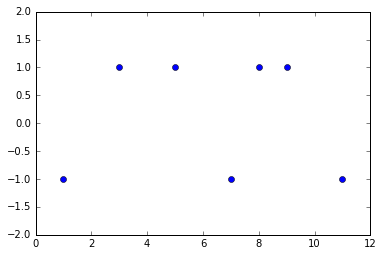

In [15]:
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
plt.plot(xs,ys,'o')
plt.ylim(-2,2)

To fit 7 points, we need degree = 6

2) Use Legendre method and plot polynomial which passes through all the points given. (80)

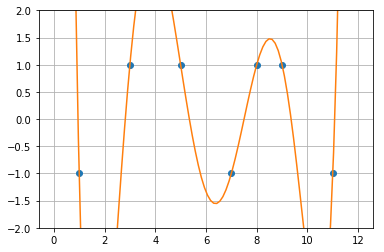

In [168]:
def legendre_generator(xs,ys):
    nterms = len(xs)
    def legendre(x):
        s= 0;
        for ix in range(nterms):
            numerator = ys[ix]
            for inum in range(nterms):
                if inum != ix:
                    numerator *= (x - xs[inum])/(xs[ix] - xs[inum])
            s += numerator
        return s     
    return legendre
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
plt.plot(xs,ys,'o')
plt.ylim(-2,2)
legend = legendre_generator(xs,ys)
linx = np.linspace(0,12,100)
liny = [legend(x) for x in linx]
plt.plot(linx,liny)
plt.grid()

### 5 Integration

1) We want to calculate

$$\int_3^7 \sqrt{x} \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

In [188]:
def d2f(x):
    return -1./(4*x**(3./2))

def error(a,b,n,x):
    return (-1./12)*((b-a)**3./n**2)*d2f(x)

def findError(a,b,n,x):
    err = error(a,b,n,x)
    while (abs(err)>1e-5):
        n+=1
        err = error(a,b,n,x)
    return n

print(findError(3,7,1,3))

161


2) Use trapezoid rule to calculate
$$\int_3^7 \sqrt{x} \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.


In [25]:
def trapez(f,a,b,n):
    edges = np.linspace(a, b, n+1)
    h = (b-a)/n
    return (sum(f(e) for e in edges[1:-1]) + 0.5*(f(a)+f(b)))*h

def f(x):
    return math.sqrt(x)

print("Ans ",trapez(f,3.,7,161))

Ans  8.882732708470547


### 6 Derivative

1) Find the lowest point in the of function `math.lgamma` in the range of [1,2]. (Give me both x and y) 

x = 1.46163421493
y = -0.12148629053377635


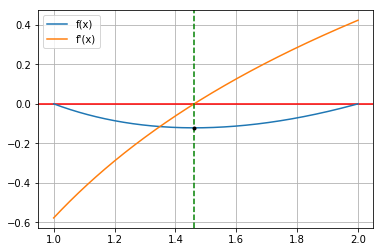

In [42]:
def f(x):
    return math.lgamma(x)
def df(x,h=0.001):
    return (f(x+h)-f(x-h))/(2*h)

xs = np.linspace(1,2,1000)
ys = [f(x) for x in xs]
ds = [df(x,h) for x in xs]
plt.axhline(0, color='red')
plt.plot(xs,ys,label="f(x)")
plt.plot(xs,ds,label="f'(x)")
plt.grid()
plt.legend()

def find_root(l,r,n): 
    mid = abs(l+r)/2.
    for i in range(n):
        if(df(l)*df(l+mid)<0):
            r = l+mid
        elif(df(r)*df(l+mid)<0):
            l = l+mid  
        mid = mid/2 
    return (l+r)/2
# print (find_root(1,2,19))

lst = [xs[0]]
for x in xs:
    if(df(lst[-1])*df(x)< 0):
        ran = find_root(lst[-1],x,19)
        print("x =", ran)
        print("y =", f(ran)) 
        plt.axvline(ran,color='green',linestyle='dashed')
        plt.plot(ran,f(ran),'.',color='k')
        lst.append(x)
# print(lst)

2) Show that 
$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x) + O(h^2)$$

$9f(x+h)=9f(x)+9f'(x)h+\frac{9f''(x)h^2}{2!}+\frac{9f^3(\xi)h^3}{3!}$

$-f(x+3h)=-f(x)-3f'(x)h-\frac{9f''(x)h^2}{2!}-\frac{27f^3(\xi')h^3}{3!}$


$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h}= \frac{1}{6h} \left(6f'(x)h+\frac{9f^3(\xi)h^3}{3!}+\frac{27f^3(\xi')h^3}{3!}\right)$

$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x)+O(h^2)$

## Creative Zone (125 Each)

The questions may look ridiculous. ** Do not panic **. It is much easier than it looks.

### 7 Confidence Interval

##### Intro


In the homework you have calculated full width half max which is a measure of how spread out a distribution is there is another measure which has a better statistical intepretation and is widely used called 95% confidence interval.

All the statistical interpretations aside(which you will learn in AJ Ko's class), the 95% interval is defined to be an interval symmetric around the most probable(highest value) $\bar{x}$, 
$$[\bar{x} - \alpha, \bar{x} + \alpha]$$ such that the **area under the distribution in this interval is 95% of the total area**. Note that the range is symmetric around the most probable(highest value) $\bar{x}$.

The concept is illustrated in the figure below that the 95% confidence interval of the distribution shown below is approximately [-1.2,1.6] since the highest point is at 0.2 and the area of interval [0.2-1.4, 0.2+1.4] = [-1.2, 1.6] is about 95% of the total area.

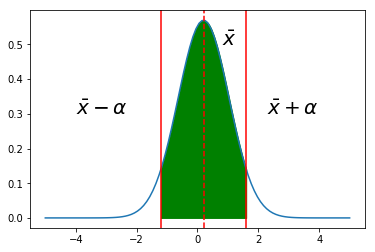

In [45]:
def gaussian(x):
    sigma = 0.7
    mu = 0.2
    return 1/math.sqrt(2*math.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma))

xs = np.linspace(-5,5,100)
ys = gaussian(xs)

xs2 = np.linspace(-1.2,1.6,100)
ys2 = gaussian(xs2)



plt.plot(xs, ys)
plt.fill_between(xs2, 0, ys2,color='green')
plt.axvline(1.6,color='r')
plt.axvline(-1.2,color='r')
plt.axvline(0.2,color='r',ls='dashed')
plt.text(-4,0.3, r'$\bar{x}-\alpha$',size=20)
plt.text(2.3, 0.3, r'$\bar{x}+\alpha$',size=20)
plt.text(0.8, 0.5,r'$\bar{x}$', size=20)


##### Your task

For this problem your task is to find 95% confidence interval for the following distribution.
$$f(x) = \frac{1}{\pi\gamma} \frac{1}{(x-\mu)^2+\gamma^2}$$
with $\mu = 1.$ and $\gamma = 2.$. Your answer should be a range. (Do it for a reasonable accuracy. If you have done the homework, you know what I mean)

You may assume that the total area from $x=-\infty, \infty$ of this distribution is 1. (It actually is 1.)

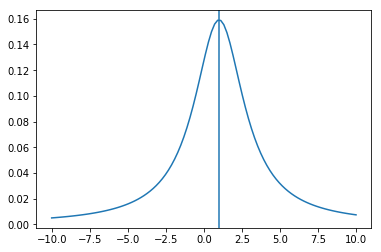

In [72]:
mu = 1.
def cauchy(x):
    mu = 1.
    gamma = 2.
    return 1./(math.pi*gamma)*(gamma**2/((x-mu)**2+gamma**2))

xs = np.linspace(-10,10, 100)
ys = cauchy(xs)
plt.plot(xs, ys)
plt.axvline(mu)

alpha  25.4125412541
[mu-alpha,mu+alpha]  -24.4125412541 26.4125412541


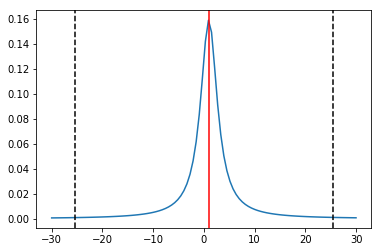

In [124]:
xs = np.linspace(-30,30, 100)
ys = cauchy(xs)
plt.plot(xs, ys)
plt.axvline(mu,color='r')

mu = 1.
def trapez(f,a,b,n):
    edges = np.linspace(a, b, n+1)
    h = (b-a)/n
    return (sum(f(e) for e in edges[1:-1]) + 0.5*(f(a)+f(b)))*h

def solve(mu):
    for a in np.linspace(0,100,10000):
        if(trapez(cauchy,mu-a,mu+a,1000) >= 0.95):
            plt.axvline(a,ls='dashed',color='k')
            plt.axvline(-a,ls='dashed',color='k')
            return (a)

alpha = solve(mu)
print("alpha ",alpha)
print("[mu-alpha,mu+alpha] ",mu-alpha,mu+alpha)



##### 8 Sum of $i^k$


#### Intro

In discrete math we learn that the sum of integer from $1 \ldots n$ is given by
$$\sum_{i=1}^n i = \frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$
and
$$\sum_{i=1}^n i^2 = \frac{n^3}{3}+\frac{n^2}{2}+\frac{n}{6}$$
and
$$\sum_{i=1}^n i^3 = \left( \frac{n(n-1)}{2} \right)^2 = \frac{n^4}{4} + \ldots$$

As you may notice, one can actually show that $\displaystyle \sum_{i=1}^n i^k$ has is a polynomial of degree $k+1$.

To calculate the sum if we use for loop and calculate the left hand side it will be $O(n)$. But if we use the right hand side we can calculate it in $O(1)$. So, calculating it with a closed form is a much better approach.

But as you recall getting the close formed formula is quite difficult to do by hands. In this problem we will use legendre polynomial to find it.

#### Problem


Use what you learn about Legendre Method and write a function that takes in $n$ and $k$ and calculate $$\sum_{i=1}^n i^k$$ in $O(k)$ (NOT $O(n)$).

##### Warning: don't try to sum up too far as it can cause integer overflow.

In [183]:
def sumofi(n,k):
    points = np.linspace(1,k+2,k+2)
    s = 0;
    summ = []
    for x in points:
        s+= x**k
        summ.append(s)
    leg = legendre_generator(points,summ)
    return leg(n)
print(sumofi(10,1))

55.0
